In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.util import random_noise
from skimage import morphology as mo

# Nombres de archivos de las imágenes
imagenes = ['./imgs/butterfly.jpeg', './imgs/quetzalgris.png', './imgs/chestXray.jpeg']

# Elemento estructurante para operaciones morfológicas
kernel = mo.disk(5)

In [2]:
# Función para aplicar ruido gaussiano a una imagen en escala de grises
def add_gaussian_noise(image):
    return random_noise(image, mode='gaussian', mean=0, var=0.05)


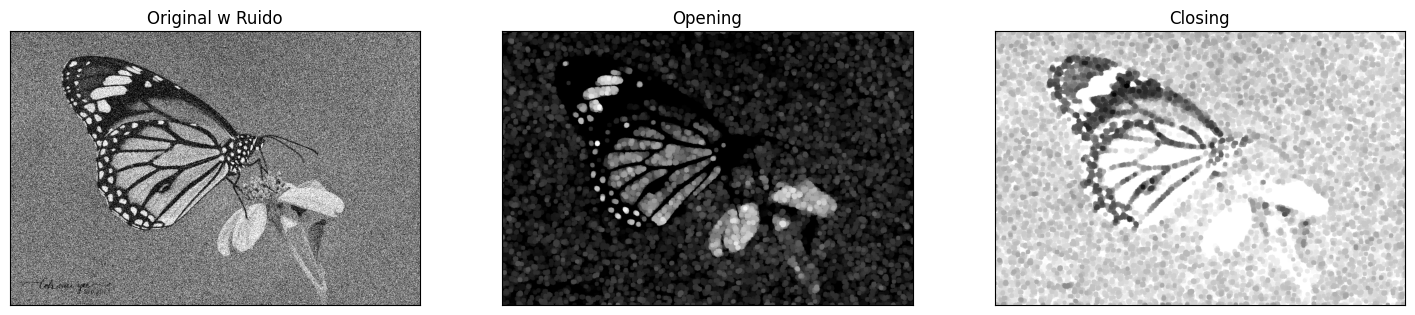

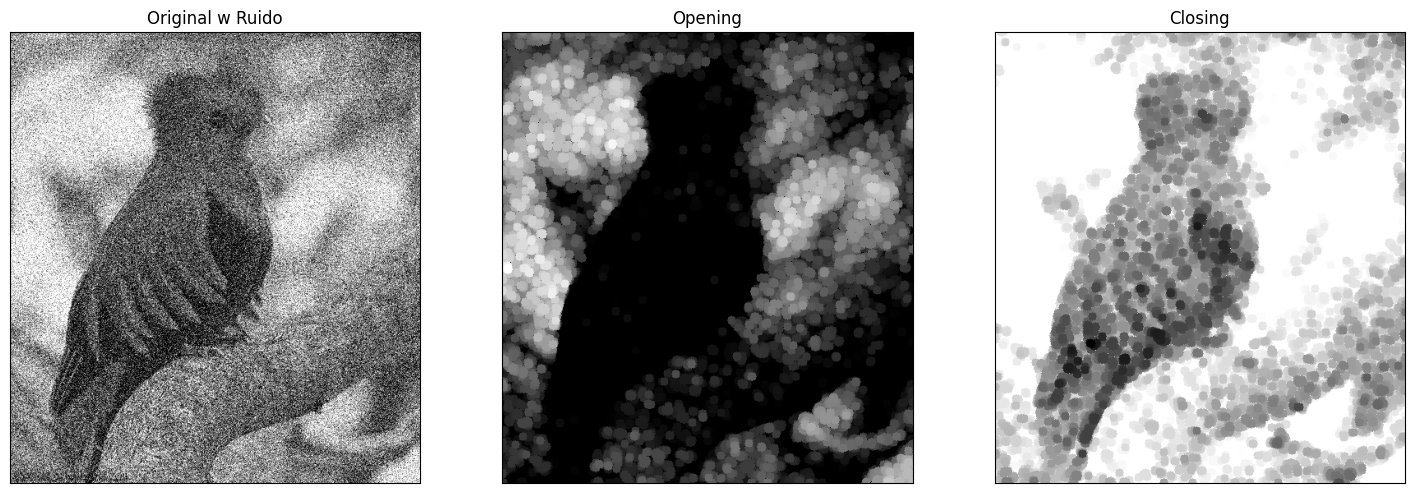

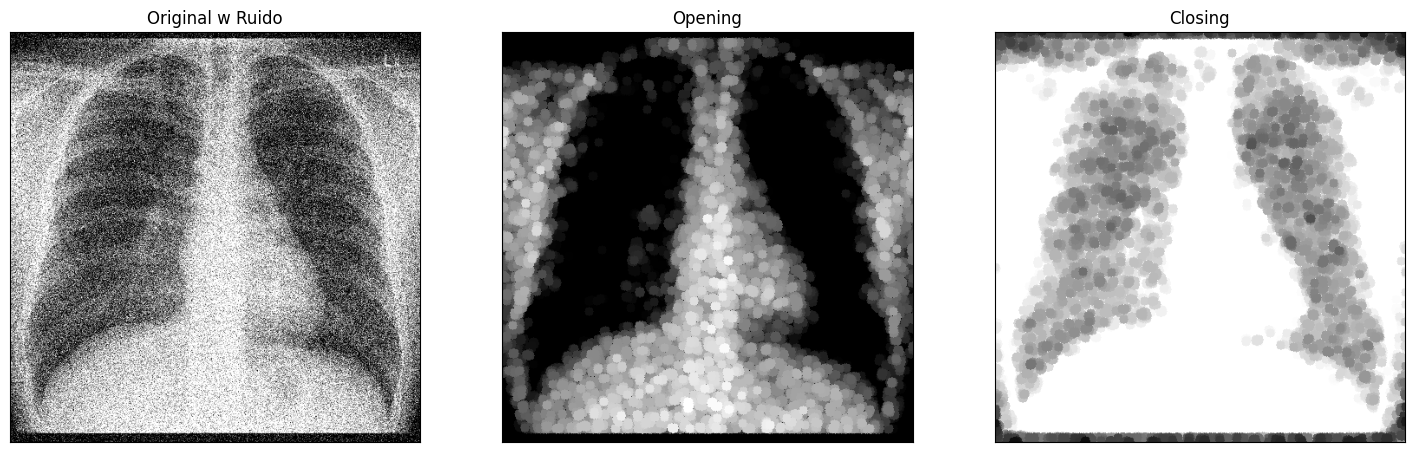

In [7]:
kernel = mo.disk(5)

for imagen in imagenes:

    I = plt.imread(imagen)

    try:
        I = ski.color.rgb2gray(I)
    except:
        I = ski.color.rgba2rgb(I)
        I = ski.color.rgb2gray(I)

    

    gray = I
    gray = add_gaussian_noise(gray)
    dilation = mo.opening(gray, kernel)
    erosion = mo.closing(gray, kernel)

    # Visualización de las imágenes
    titles = ['Original w Ruido', 'Opening', 'Closing']
    images = [gray, dilation, erosion]
    
    plt.figure(figsize=(18, 12))
    for i in range(3):
        plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()


## Reflexion
El ruido añadido a las imágenes causa una degradación significativa de la calidad visual, introduciendo variaciones aleatorias de intensidad que pueden interpretarse como artefactos o detalles espurios en el análisis de la imagen.

El opening, que es una erosión seguida de una dilatación utilizando un elemento estructurante particular, tiende a eliminar pequeños objetos o variaciones de intensidad en una imagen, como el ruido. Como resultado, el opening en estas imágenes ha eliminado una gran cantidad del ruido de la imagen, pero también ha causado una pérdida de algunos detalles finos, como se puede ver en la imagen de la mariposa y del quetzal donde las alas y las plumas muestran menos textura.

El closing, una dilatación seguida de una erosión, tiende a cerrar pequeños huecos y a conectar regiones cercanas en la imagen. Este proceso puede ayudar a restaurar algunos de los detalles que fueron erosionados durante el opening, pero también puede causar que el ruido que tiene una estructura similar a los objetos de interés se amplifique o se fusione con ellos, como se puede observar en la radiografía de tórax, donde los bordes y las estructuras internas se vuelven más suaves y continuos, aunque todavía hay presencia de artefactos de ruido.

En general, el filtrado secuencial puede ser eficaz para reducir el ruido mientras se preserva la forma general de los objetos en la imagen. Sin embargo, el equilibrio entre la eliminación del ruido y la conservación de los detalles depende del tamaño y la forma del elemento estructurante utilizado, así como del nivel y tipo de ruido presente en la imagen. En estas imágenes, parece que el closing ha sido más efectivo en la restauración de la estructura general de los objetos después del opening, pero con un compromiso entre la claridad y la presencia de ruido residual.